In [1]:
from imobiliare_eda import get_parsed_csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = get_parsed_csv()
pd.set_option('display.max_info_columns', 2000)  # or a value larger than your number of columns

# Acest atribut e corelat 0.93 cu Suprafata Utila, asadar, x_i = x_j si combinatia liniara dintre theta_i si theta_j este adevarutul "weight"
# Deci avem doua weighturi theta_i, theta_j care nu inseamna nimic. (Doar suma lor reprezinta ceva)
df = df.drop(columns=['Suprafaţăconstruită', 'Etaj'])

In [21]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

3823
0


In [22]:
sns.pairplot(df[['Nr.camere', 'Etaj', 'price', 'Suprafaţăutilă', 'Nr.băi', 'building_age']])

KeyError: "['Etaj'] not in index"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25888 entries, 0 to 35691
Data columns (total 228 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    Etaj                               25888 non-null  float64
 1    Nr.băi                             25888 non-null  float64
 2    Nr.camere                          25888 non-null  float64
 3    Suprafaţăutilă                     25888 non-null  float64
 4    price                              25888 non-null  float64
 5    is_apartament                      25888 non-null  int64  
 6    is_casa                            25888 non-null  int64  
 7    is_confort_lux                     25888 non-null  int64  
 8    is_confort_1                       25888 non-null  int64  
 9    is_confort_2                       25888 non-null  int64  
 10   is_confort_3                       25888 non-null  int64  
 11   building_age                       25888 non

In [6]:
df = df[df['Suprafaţăutilă'] <= 130]
df = df[df['price'] <= 220000]

<Axes: >

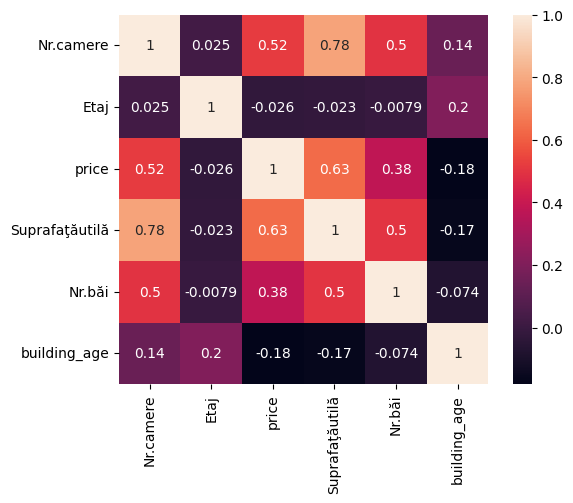

In [7]:
corr = df[['Nr.camere', 'Etaj', 'price', 'Suprafaţăutilă', 'Nr.băi', 'building_age']].corr()
sns.heatmap(corr, cbar=True, annot=True, square=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [9]:
# Separate features and target
X = df.drop(columns='price')  # Features
y = df['price']               # Target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.isna().sum()

Etaj                           0
Nr.băi                         0
Nr.camere                      0
Suprafaţăutilă                 0
is_apartament                  0
                              ..
is_zona_zona_vitan             0
is_zona_zona_vitan-barzesti    0
is_zona_zona_vitanmall         0
is_zona_zona_vitanulnou        0
is_zona_zona_zetarilor         0
Length: 227, dtype: int64

In [11]:
# Suppose you know which are numeric and which are binary
numeric_features = ['Nr.camere', 'Etaj', 'Suprafaţăutilă', 'Nr.băi', 'building_age']

binary_features = [col for col in df.columns if col not in numeric_features and not col == 'price']


# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features)
    ]
)

# Apply transformation
X_scaled = X

In [12]:
all_features = numeric_features + binary_features

X_scaled_df = pd.DataFrame(X_scaled, columns=all_features)
X_scaled_df

,Nr.camere,Etaj,Suprafaţăutilă,Nr.băi,building_age,is_apartament,is_casa,is_confort_lux,is_confort_1,is_confort_2,...,is_zona_zona_vest,is_zona_zona_veteranilor,is_zona_zona_victoriei,is_zona_zona_viilor,is_zona_zona_virtutii,is_zona_zona_vitan,is_zona_zona_vitan-barzesti,is_zona_zona_vitanmall,is_zona_zona_vitanulnou,is_zona_zona_zetarilor
0,2.0,9.0,48.00,1.0,43,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,9.0,50.00,1.0,54,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,6.0,68.00,1.0,57,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,3.0,3.0,64.00,1.0,57,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,3.0,5.0,57.00,1.0,65,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35687,2.0,4.0,69.00,1.0,4,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
35688,2.0,4.0,65.00,1.0,4,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
35689,2.0,9.0,54.54,1.0,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
35690,3.0,3.0,71.00,2.0,44,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
pipeline = make_pipeline(
    # preprocessor,
    LinearRegression()
)


In [14]:
pipeline.fit(X_train, y_train)

,steps,"[('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = pipeline.predict(X_test)

In [16]:
y_pred

array([ 53298.95005524,  98021.79572269,  88212.08395014, ...,
       150704.62870969,  77508.84056947,  93206.53177285], shape=(4520,))

In [17]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(30))

      Actual      Predicted
0    41500.0   53298.950055
1    73155.0   98021.795723
2    75000.0   88212.083950
3   109500.0  128072.001446
4    84500.0   89829.825858
5   139700.0  120430.422504
6    98000.0  114635.038895
7   111000.0  100418.679098
8    84900.0  106263.740629
9    86000.0   82911.149505
10  112000.0  122147.291387
11  160300.0  138584.940862
12  138000.0  145113.126339
13   67300.0   68147.427298
14   69900.0   63760.890701
15   98095.0  107632.718465
16   83500.0   66364.013920
17  110000.0   96520.093167
18  129000.0  129146.215593
19   85000.0   69804.413643
20   71428.0   76600.852318
21  109580.0  118588.414428
22  120000.0  104190.943565
23  139980.0   88684.471861
24   50000.0   40189.983494
25   91500.0  103874.185201
26  126050.0  109374.491049
27   57142.0   64416.255265
28  162000.0  113674.975483
29  140000.0  122928.599578


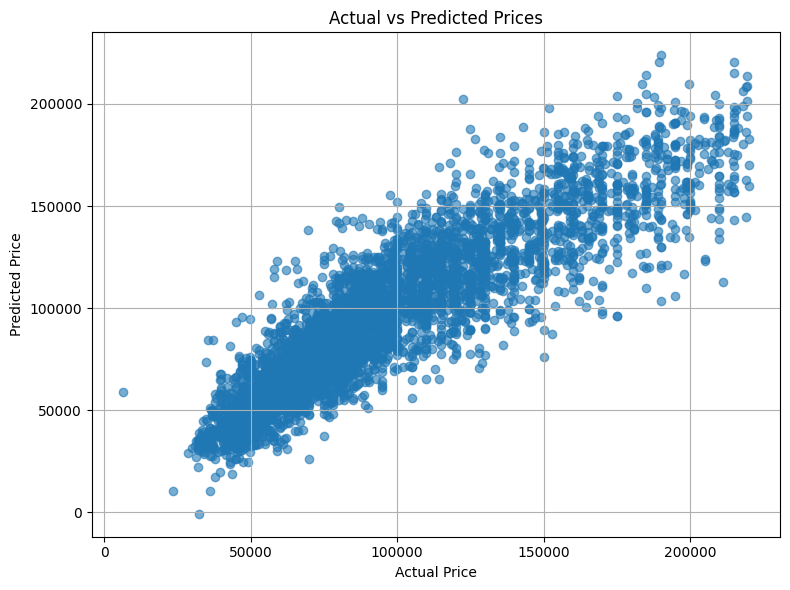

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.783965785913654
MSE: 379251991.3659366
